### Prepare Image Data into Same Format (0000, 0001, ...)

In [1]:
%matplotlib inline

import os
import glob

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import pprint
import shutil

In [2]:
import skimage.io
import skimage.morphology
import skimage.segmentation

In [ ]:
"""
    example folder structure: 
        DNA_FISH
            -2017-05-01
                -Images
                -Segmentation
                    -masks
    Saved folder:
        DNA_FISH
            -raw_images
            -raw_annotations
""" 
def preprocess_folder(folder_name)
    img_count = 0
    fd_list = os.listdir(folder_name)

    for fd in fd_list:
        print(fd)
        image_list = os.listdir(folder_name + "/" + fd + "/Images")
        mask_list = os.listdir(folder_name + "/" + fd + "/Segmentation/masks")
        mask_list = [x for x in mask_list if x.endswith("mat")]
        
        raw_images_fn = folder_name + "/raw_images/"
        raw_annotations_fn = folder_name + "/raw_annotations/"
        os.makedirs(raw_images_fn, exist_ok=True)
        os.makedirs(raw_annotations_fn, exist_ok=True)

        for img, mask in zip(image_list, mask_list):
            # img is simply copy to raw_images dir
            shutil.copy2(folder_name + "/" + fd + "/Images/" + img, raw_images_fn + "{:04d}".format(img_count) + ".tif")
            # mask is read in, change last index and save to raw_annotations
            d = loadmat(folder_name + "/" + fd + "/Segmentation/masks/" + mask)
            mat = d["LcFull"]
            mat[mat == mat.max()] = 0
            skimage.io.imsave(raw_annotations_fn + "{:04d}".format(img_count) + ".png", mat) 
            img_count += 1
            
    print("Total image: ", image_count)

In [24]:
# for folder doesn't have segmentation
def preprocess_folder2(folder_name):
    img_count = 0
    
    dest_folder = folder_name + "/raw_images/"
    os.makedirs(dest_folder, exist_ok=True)
    
    fd_list = os.listdir(folder_name)
    for fd in fd_list:
        print(fd)
        image_list = os.listdir(folder_name + "/" + fd)

        for img in image_list:
            # img is simply copy to raw_images dir
            shutil.copy2(folder_name + "/" + fd + "/" + img, dest_folder + "{:04d}".format(img_count) + ".tif")
            img_count += 1
            
    print("Total image: ", image_count)    

In [25]:
preprocess_folder2("IF")

2019-01-25-IF
2019-01-30-IF
2019-02-13-IF-008
2019-02-16-IF-006


In [27]:
preprocess_folder2("Lineage Tracking/Lineage Tracking-ZY")

2019-06-13-Stage12
2019-06-13-Stage2
2019-06-13-Stage9


In [28]:
preprocess_folder2("Lineage Tracking/seg_samples_KZ")

01
02
03
04
05


#### show the images

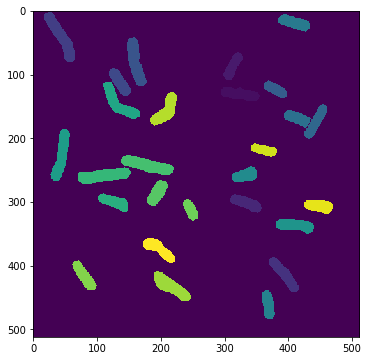

In [5]:
img_name = '0000'

ori_img_filename = os.path.join("raw_images", img_name + ".tif")
original_image = skimage.io.imread(ori_img_filename)
annot_filename = os.path.join("raw_annotations", img_name + ".png")
raw_label = skimage.io.imread(annot_filename)

plt.figure(figsize=(6,6))
plt.imshow(raw_label)
plt.show()

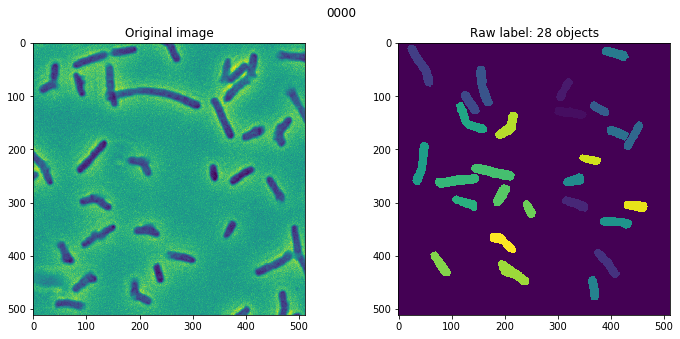

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(img_name)
ax[0].set_title("Original image")
ax[0].imshow(original_image)
ax[1].set_title("Raw label: " + str(len(np.unique(raw_label))) + " objects")
ax[1].imshow(raw_label)